In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#reading file
df = pd.read_csv("Wheat 2.csv",low_memory=False)
df

,Sigma_VH,Sigma_VV,C11,C22,Eig1,Eig2,w1,w2,q,mc,tan Qc,Qc,Unnamed: 12,p1,p2,log2p1,log2p2,Unnamed: 17,Hc
0,0.039153,0.202191,0.075329,0.012490,0.076999,0.010821,0.354519,0.062464,0.176195,0.700399,0.793888,38.445647,NaN,0.850199,0.149801,-0.234127,-2.738885,NaN,0.609341
1,0.017670,0.168605,0.049212,0.009301,0.049486,0.009026,0.267302,0.035998,0.134670,0.762628,0.847567,40.283501,NaN,0.881314,0.118686,-0.182272,-3.074776,NaN,0.525573
2,0.015118,0.139567,0.062896,0.005074,0.063095,0.004875,0.265557,0.025066,0.094389,0.827504,0.896789,41.885402,NaN,0.913752,0.086248,-0.130125,-3.535368,NaN,0.423820
3,0.023249,0.150321,0.072991,0.011310,0.074020,0.010281,0.297332,0.044841,0.150811,0.737905,0.827039,39.592070,NaN,0.868953,0.131047,-0.202650,-2.931841,NaN,0.560303
4,0.018193,0.131005,0.055560,0.008128,0.055953,0.007735,0.242518,0.034056,0.140426,0.753731,0.840297,40.040233,NaN,0.876865,0.123135,-0.189573,-3.021692,NaN,0.538305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.012791,0.073149,0.038158,0.005429,0.038668,0.004918,0.149975,0.023138,0.154281,0.732681,0.822568,39.439633,NaN,0.866340,0.133660,-0.206994,-2.903365,NaN,0.567390
111,0.011074,0.069165,0.025933,0.005342,0.026516,0.004759,0.121614,0.021174,0.174109,0.703419,0.796650,38.542591,NaN,0.851710,0.148290,-0.231566,-2.753504,NaN,0.605545
112,0.010866,0.045485,0.026520,0.005080,0.027012,0.004587,0.099017,0.020533,0.207369,0.656494,0.751842,36.937376,NaN,0.828247,0.171753,-0.271867,-2.541594,NaN,0.661699
113,0.011187,0.080560,0.027345,0.003085,0.027738,0.002692,0.135644,0.016964,0.125060,0.777683,0.859575,40.681519,NaN,0.888841,0.111159,-0.170002,-3.169310,NaN,0.503401


In [3]:
nwdf=df[['Qc','Hc']]
data_types = nwdf.dtypes

print(data_types)

Qc    float64
Hc    float64
dtype: object


In [4]:
col1='Hc'
col2='Qc'

try:
    # Attempt conversion, ignoring errors (e.g., non-numeric values)
  nwdf.iloc[:, nwdf.columns.get_loc('Hc')] = pd.to_numeric(nwdf['Hc'], errors='coerce')

except:
    pass
try:
    # Attempt conversion, ignoring errors (e.g., non-numeric values)
  nwdf.iloc[:, nwdf.columns.get_loc('Qc')] = pd.to_numeric(nwdf['Qc'], errors='coerce')

except:
    pass



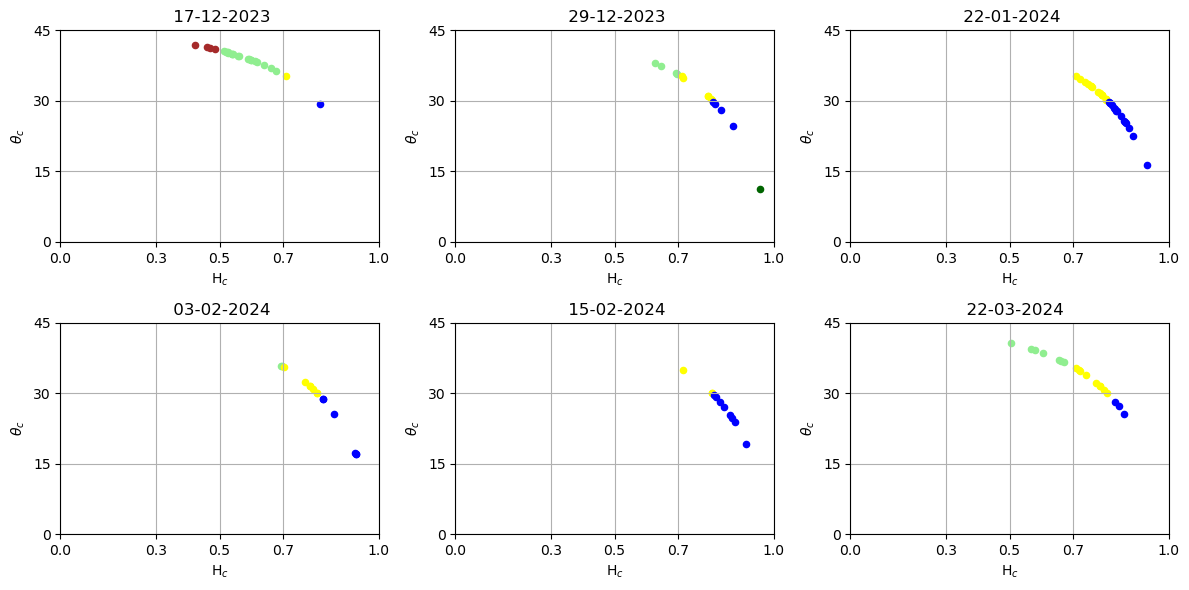

In [5]:
# Paper 2
H_m=[]
Q_m=[]
def generate_plot(r1, r2, fig, ax):
  xdf = nwdf[r1:r2]

  H1 = xdf['Hc'].mean()
  Q1 = xdf['Qc'].mean()
  H_m.append(H1)
  Q_m.append(Q1)  

  # Option 1: Using linewidths (adjust value as needed)
  # ax.scatter(xdf['Hc'], xdf['Qc'], markeredgewidth=0, linewidths=0.1)

  # Option 2: Using markers without edges
  ax.scatter(xdf['Hc'], xdf['Qc'], marker='.')  # Point marker (no edge)

  ax.set_xlim(0, 1)
  ax.set_ylim(0, 45)
  ax.set_xticks([0, 0.3, 0.5, 0.7, 1.0])
  ax.set_yticks([0, 15, 30, 45])

  # Define quadrant boundaries (adjust as needed)
  quadrant_1 = (xdf['Hc'] >= 0) & (xdf['Hc'] <= 0.3) & (xdf['Qc'] >= 0)
  quadrant_2 = (xdf['Hc'] >= 0.3) & (xdf['Hc'] <= 0.5) & (xdf['Qc'] >= 0)
  quadrant_3 = (xdf['Hc'] >= 0.5) & (xdf['Hc'] <= 0.7) & (xdf['Qc'] >= 0)
  quadrant_4 = (xdf['Hc'] >= 0.7) & (xdf['Hc'] <= 1) & (xdf['Qc'] >= 30) & (xdf['Qc'] <= 45)
  quadrant_5 = (xdf['Hc'] >= 0.7) & (xdf['Hc'] <= 1) & (xdf['Qc'] >= 15) & (xdf['Qc'] <= 30)
  quadrant_6 = (xdf['Hc'] >= 0.7) & (xdf['Hc'] <= 1) & (xdf['Qc'] <= 15)

  # Plot each quadrant with a different color
  xdf[quadrant_1].plot(kind='scatter', x='Hc', y='Qc', color='pink', ax=ax)
  xdf[quadrant_2].plot(kind='scatter', x='Hc', y='Qc', color='brown', ax=ax)
  xdf[quadrant_3].plot(kind='scatter', x='Hc', y='Qc', color='lightgreen', ax=ax)
  xdf[quadrant_4].plot(kind='scatter', x='Hc', y='Qc', color='yellow', ax=ax)
  xdf[quadrant_5].plot(kind='scatter', x='Hc', y='Qc', color='blue', ax=ax)
  xdf[quadrant_6].plot(kind='scatter', x='Hc', y='Qc', color='darkgreen', ax=ax)

  ax.grid(True)

# List of ranges for generating plots
ranges = [(0, 25), (25, 40), (40, 70), (70, 85), (85, 96), (96, 115)]
dates = ["17-12-2023", "29-12-2023", "22-01-2024", "03-02-2024", "15-02-2024"," 22-03-2024"]
# Create a figure with a 2x3 grid layout (adjust if needed for the number of plots)
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Generate and plot graps on each subplot
for i, (r1, r2) in enumerate(ranges):
  ax = axes.flat[i]
  date_to_display = dates[i]    
  ax.set_title(f" {date_to_display}")
  
  generate_plot(r1, r2, fig, ax)
  ax.set_xlabel(r'H$_c$')
  ax.set_ylabel(r'$\theta_c$')

# Adjust layout and spacing (optional)
# fig.suptitle("Multiple Scatter Plots with Quadrants (Ranges from your list)")
plt.tight_layout()

# Save the image
plt.savefig("multiple_scatter_plots_custom_ranges_no_outline.png")

# Optionally, display the image (if running the script directly)
plt.show()

In [6]:
print(H_m)

[0.5715376337191242, 0.7711049219319305, 0.8074972278474228, 0.8078620787561462, 0.8322596885629866, 0.715900005028919]


In [7]:
print(Q_m)

[38.96495865861293, 30.85941120355609, 29.41383715313639, 28.57277705934915, 27.520060259102355, 33.93729092476563]
